In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [114]:
date = "18"
f=[]
for i in np.arange(4,10,1):
    f = (h5py.File("/data/SC_data/TemperatureAndPressure201911%s/TempAndPressure201911%s_%iAM.hdf5" %(date,date,i)))
    print(list(f))

[]
[]
[]
[]
[]
[]


In [90]:
airtemperature_list = []
surfacetemperature_list = []
pressure_list = []

for i in np.arange(0,len(f),1):
    airtemperature_list.extend(list(f[i]["AirTemperature/AirTemperatures"]))
    surfacetemperature_list.extend(list(f[i]["SurfaceTemperature/SurfaceTemperatures"]))
    pressure_list.extend(list(f[i]["Pressure/Pressures"]))


In [91]:
len(airtemperature_list)

21599

In [134]:
def get_temperature_and_pressure(date,from_hour,to_hour,):
    f=[]
    for i in np.arange(from_hour,to_hour,1):
        if(i<12):
            am_or_pm="AM"
        if(i>=12):    
            am_or_pm="PM"
        if(i==0):
            i = i+12
        if(i>12):
            i = (i-12)
        if(i<10):
            hour = "0%d" %i
        if(i>9):
            hour ="%d" %i
        f.append(h5py.File("/data/SC_data/TemperatureAndPressure%s/TempAndPressure%s_%s%s.hdf5" %(date,date,hour,am_or_pm)))
    airtemperature_list = []
    surfacetemperature_list = []
    pressure_list = []
    for i in np.arange(0,len(f),1):
        airtemperature_list.extend(list(f[i]["AirTemperature/AirTemperatures"]))
        surfacetemperature_list.extend(list(f[i]["SurfaceTemperature/SurfaceTemperatures"]))
        pressure_list.extend(list(f[i]["Pressure/Pressures"]))
    return airtemperature_list, surfacetemperature_list, pressure_list

In [234]:
air,surface,pressure = get_temperature_and_pressure(20191118,from_hour=4,to_hour=6)

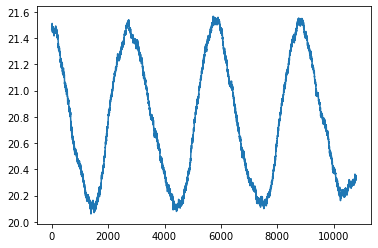

In [148]:
plt.plot(air)

In [151]:
air,surface,pressure = get_temperature_and_pressure(20191115,from_hour=19,to_hour=23)

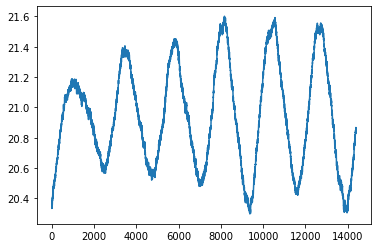

In [152]:
plt.plot(air)

In [209]:
def rebin(a, *args):
    '''rebin ndarray data into a smaller ndarray of the same rank whose dimensions
    are factors of the original dimensions. eg. An array with 6 columns and 4 rows
    can be reduced to have 6,3,2 or 1 columns and 4,2 or 1 rows.
    example usages:
    >>> a=rand(6,4); b=rebin(a,3,2)
    >>> a=rand(6); b=rebin(a,2)
    '''
    shape = a.shape
    lenShape = len(shape)
    factor = np.asarray(shape)/np.asarray(args)
    evList = ['a.reshape('] + \
             ['args[%d],factor[%d],'%(i,i) for i in range(lenShape)] + \
             [')'] + ['.sum(%d)'%(i+1) for i in range(lenShape)] + \
             ['/factor[%d]'%i for i in range(lenShape)]
    print (''.join(evList))
    return eval(''.join(evList))

In [232]:
surface

[14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111198116,
 14.915820111

In [231]:
rebin(np.asarray(air),1440)

a.reshape(args[0],factor[0],).sum(1)/factor[0]


TypeError: 'numpy.float64' object cannot be interpreted as an integer

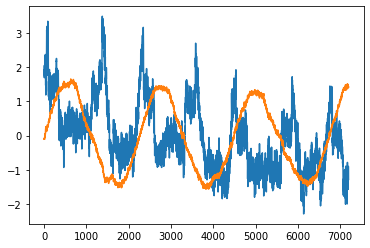

In [245]:
plt.plot((pressure-np.mean(pressure))/np.std(pressure))
plt.plot((air-np.mean(air))/np.std(air))
#plt.plot(np.resize(air,(1440,)))